In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [3]:
train_data = pd.read_excel("Data_Train.xlsx")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.shape

(10683, 11)

Our dataset contains 10683 rows (obseravtions) and 11 columns(features)

In [9]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 45m      1
19h 50m      1
42h 45m      1
5m           1
31h 30m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
train_data.dropna(inplace = True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

From above it is seen that our data do not contains any missing or nulls values so we can directly start EDA on our dataset.

From the description we can see that Date_Of_Journey is a object data type. So, we have to convert this into timestamp so as to use it
properly for prediction.

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"] , format = "%d/%m/%Y").dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Since we have converted Date_of_Journey into integer so we can drop that column as its not any of use.

In [15]:
train_data.drop(["Date_of_Journey"],axis = 1, inplace = True)

Now we can extract values from Dep_Time.

In [16]:
train_data["Dep_Hours"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

Now like Date_of_Journey we can drop Dep_Time as well.

In [17]:
train_data.drop(["Dep_Time"],axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Like Date_of_Journey and Dep_time we will extract the values from Arrival_Time, convert the values and drop the column as it is also of no use.

In [19]:
train_data["Arrival_Hours"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

train_data.drop(["Arrival_Time"],axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Same as above we will do with Duration column as well.

In [21]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [22]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"],axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Handling the categorical data now.

In [25]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

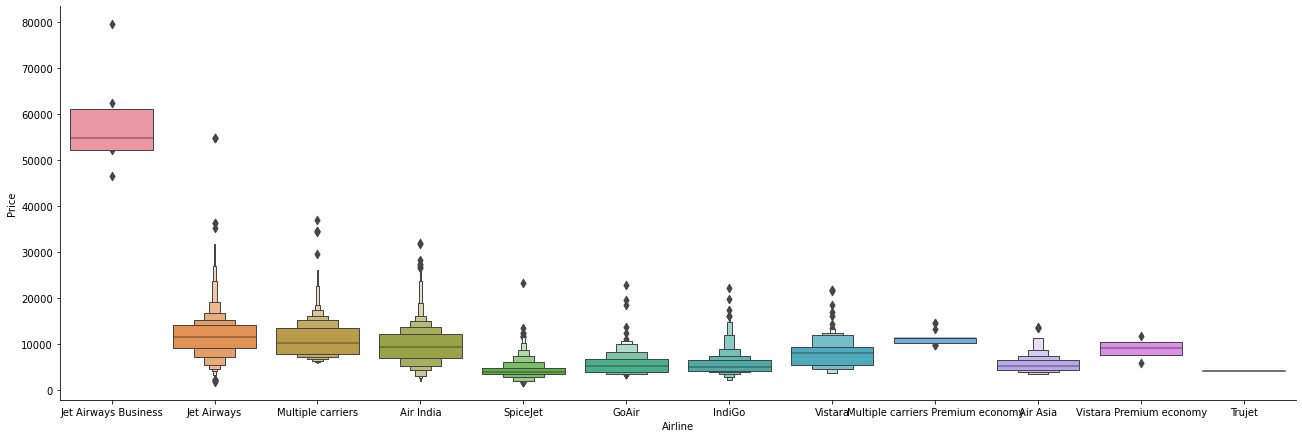

In [26]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind = "boxen" ,height = 6, aspect =3)
plt.show()

As airline is nominal categorical data we have to perfom encoding.

In [27]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

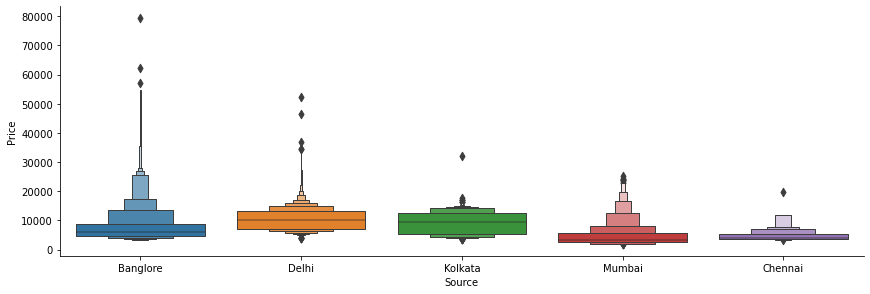

In [29]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind = "boxen" ,height = 4, aspect =3)
plt.show()

As like airline source is also a nominal categorical data so it also needs an encoding.

In [30]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source , drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Destination too is nominal categorical data so it also require encoding.

In [32]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination , drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
train_data.drop(["Route" , "Additional_Info"], axis = 1, inplace = True)

In [35]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

The total_stops are in ordinal categorical data so here we need to perform LabelEncoder.

In [36]:
train_data.replace({"non-stop":0 ,"1 stop":1, "2 stops":2,"3 stops":3, "4 stops":4}, inplace=True)

In [37]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [41]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape

(10682, 30)

In [43]:
test_data = pd.read_excel("Test_set.xlsx")

In [44]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [46]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
data_train.shape

(10682, 30)

In [48]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hours',
       'Dep_min', 'Arrival_Hours', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [49]:
x = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hours',
       'Dep_min', 'Arrival_Hours', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

x.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hours,Dep_min,Arrival_Hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

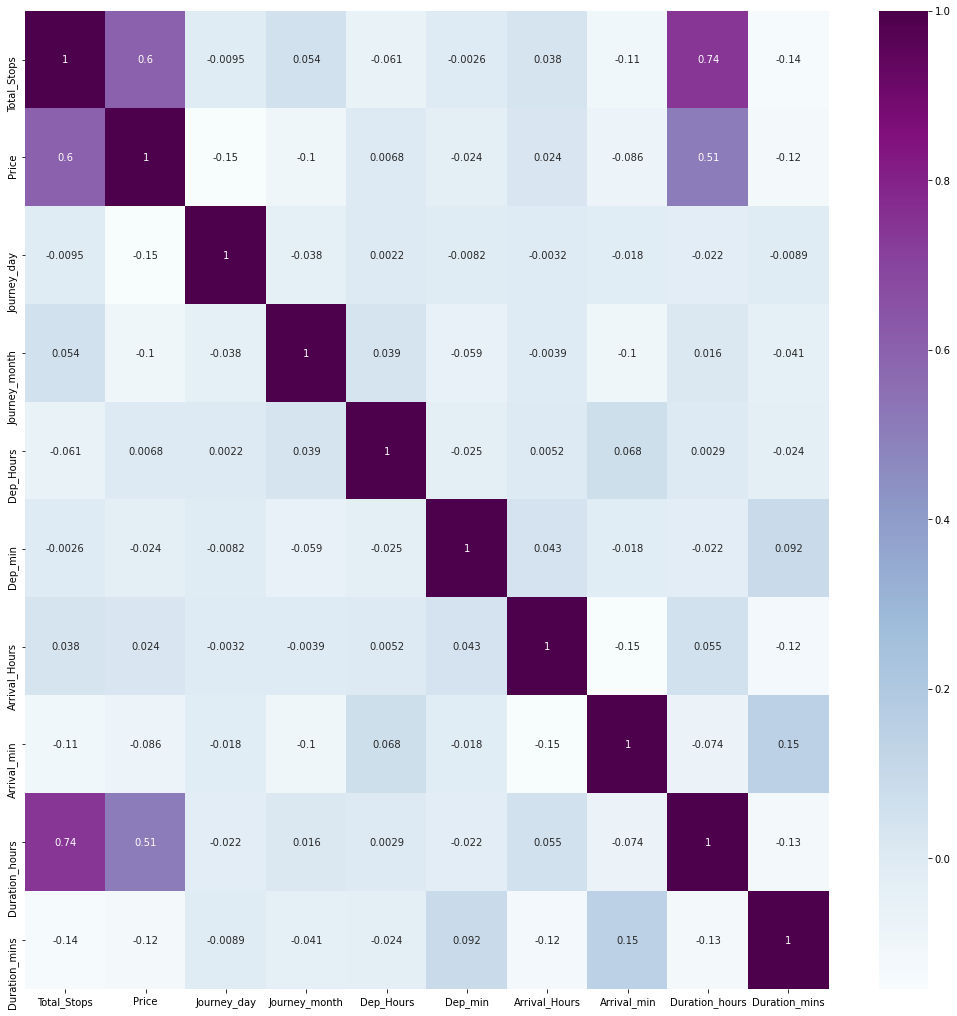

In [51]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "BuPu")

plt.show()

Important feature selection.

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [53]:
print(selection.feature_importances_)

[2.58558958e-01 1.44451790e-01 5.17542531e-02 2.43717295e-02
 2.17781336e-02 2.78412382e-02 1.91397884e-02 1.13373784e-01
 1.72021184e-02 7.94131249e-03 1.84091065e-03 1.95811811e-02
 1.30450132e-01 6.68736180e-02 1.88501837e-02 7.71268213e-04
 3.60389304e-03 1.34456117e-04 4.88728949e-03 8.25042708e-05
 5.27525844e-04 6.83808756e-03 3.16366788e-03 6.07252833e-03
 6.15532745e-03 1.14925394e-02 6.99970041e-03 5.14270607e-04
 2.47478101e-02]


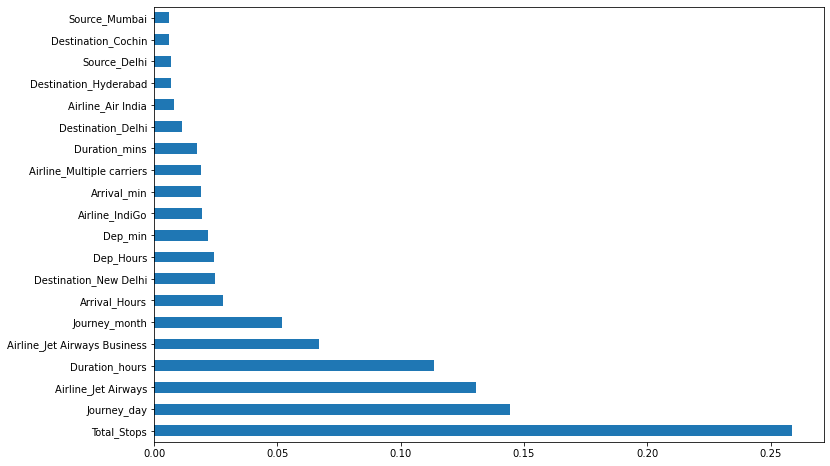

In [54]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = x.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

Fitting model and getting out the best with best accuracy.

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x, y , test_size = 0.2, random_state = 42)

1. RandomForest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [95]:
y_pred_rf = reg_rf.predict(x_test)

In [96]:
reg_rf.score(x_train, y_train)

0.9540005906357307

In [97]:
reg_rf.score(x_test,y_test)

0.7968910904830939

Printing the best params for random forest regressor.

In [98]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf_params = {'n_estimators': [100,200,300,400,500], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}
rnd_reg = RandomizedSearchCV(RandomForestRegressor(), reg_rf_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5,
                            n_jobs = -1)
rnd_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [99]:
print(rnd_reg.best_estimator_)
rnd_reg.best_params_

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300)


{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2}

In [100]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R squared : ",metrics.r2_score(y_test,y_pred))

MAE :  1974.1052611379714
MSE :  8214135.1847234685
RMSE :  2866.031260248825
R squared :  0.6190467615317858


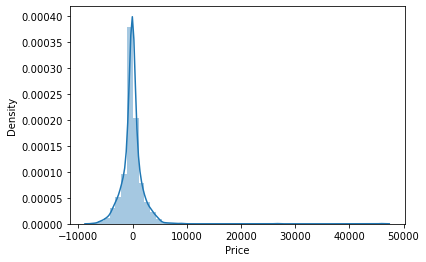

In [103]:
sns.distplot(y_test-y_pred_rf)
plt.show()

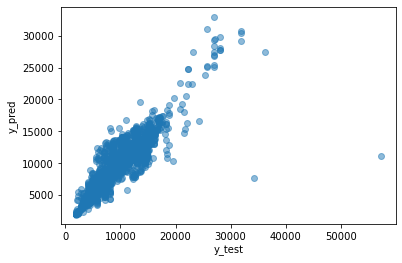

In [104]:
plt.scatter(y_test,y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

2.DecisionTree Regression

In [107]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
reg_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [108]:
y_pred_dt = reg_dt.predict(x_test)

In [109]:
reg_dt.score(x_train, y_train)

0.9692484150527355

In [110]:
reg_dt.score(x_test,y_test)

0.7256319762511667

In [111]:
from sklearn.model_selection import GridSearchCV
depth = list(range(3,10))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv = 10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]})

In [112]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=9)


{'max_depth': 9}

In [113]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred_dt))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred_dt))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))
print("R squared : ",metrics.r2_score(y_test,y_pred_dt))

MAE :  1340.085595070972
MSE :  5915938.781621302
RMSE :  2432.270293701196
R squared :  0.7256319762511667


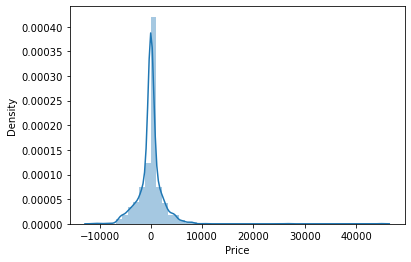

In [114]:
sns.distplot(y_test-y_pred_dt)
plt.show()

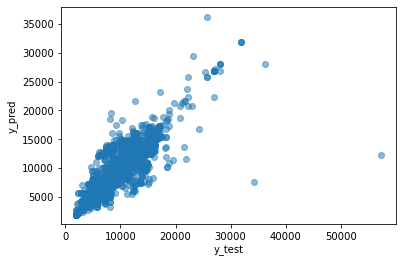

In [115]:
plt.scatter(y_test,y_pred_dt, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

3. KNN Regression

In [116]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor()
reg_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [117]:
y_pred = reg_knn.predict(x_test)

In [118]:
reg_knn.score(x_train, y_train)

0.7366739328808404

In [119]:
reg_knn.score(x_test,y_test)

0.570669349010061

In [120]:
k_range = list(range(1,30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [121]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=3)


{'n_neighbors': 3}

In [122]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R squared : ",metrics.r2_score(y_test,y_pred))

MAE :  1889.9342068320075
MSE :  9257251.678334113
RMSE :  3042.5732001603697
R squared :  0.570669349010061


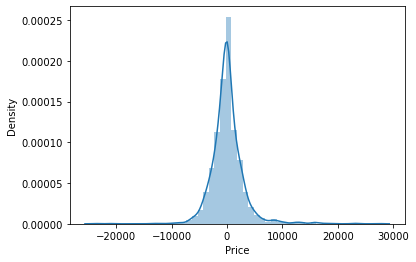

In [123]:
sns.distplot(y_test-y_pred)
plt.show()

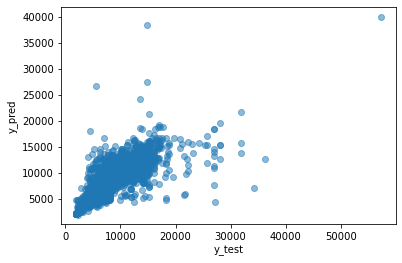

In [124]:
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

4. Lasso Regression

In [125]:
from sklearn.linear_model import Lasso
reg_las = Lasso()
reg_las.fit(x_train,y_train)

Lasso()

In [126]:
y_pred = reg_las.predict(x_test)

In [127]:
reg_las.score(x_train, y_train)

0.6238132886849226

In [128]:
reg_las.score(x_test,y_test)

0.6190467615317858

In [129]:
params = {"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params, cv = 15, scoring = 'neg_mean_squared_error',n_jobs=-1)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   100000]},
             scoring='neg_mean_squared_error')

In [130]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=0.1)


{'alpha': 0.1}

In [131]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R squared : ",metrics.r2_score(y_test,y_pred))

MAE :  1974.1052611379714
MSE :  8214135.1847234685
RMSE :  2866.031260248825
R squared :  0.6190467615317858


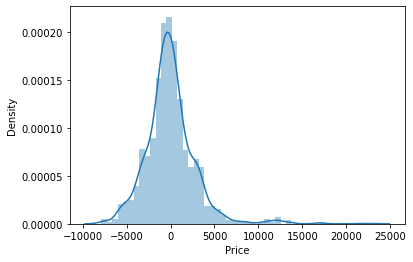

In [132]:
sns.distplot(y_test-y_pred)
plt.show()

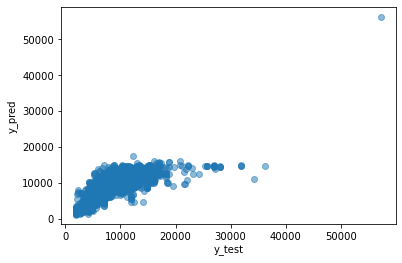

In [133]:
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

5. Ridge Regression

In [134]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge()
reg_ridge.fit(x_train,y_train)

Ridge()

In [135]:
y_pred = reg_ridge.predict(x_test)

In [136]:
reg_ridge.score(x_train, y_train)

0.6222496139165635

In [137]:
reg_ridge.score(x_test,y_test)

0.6185357441757697

In [138]:
params = {"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]}
ridge_regressor = GridSearchCV(Lasso(), params, cv = 15, scoring = 'neg_mean_squared_error',n_jobs=-1)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   100000]},
             scoring='neg_mean_squared_error')

In [139]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Lasso(alpha=0.1)


{'alpha': 0.1}

In [140]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R squared : ",metrics.r2_score(y_test,y_pred))

MAE :  1977.2527128500392
MSE :  8225153.7697365135
RMSE :  2867.9528883397847
R squared :  0.6185357441757697


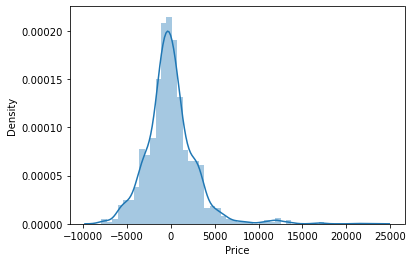

In [141]:
sns.distplot(y_test-y_pred)
plt.show()

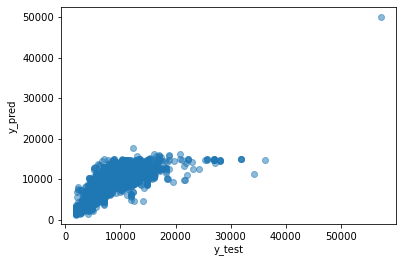

In [142]:
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

From above we can see that the values of RandomForestRegressor is highest amongst all the models so we will save that as the best model.

In [143]:
import pickle

In [144]:
file = open('flight_rf.pk1','wb')

pickle.dump(rnd_reg, file)

In [145]:
model = open('flight_rf.pk1','rb')
ranfor = pickle.load(model)

In [146]:
y_prediction = ranfor.predict(x_test)

In [147]:
metrics.r2_score(y_test, y_prediction)

0.8119152600389906